# Retention Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Cohort Analysis

In [2]:
orders = pd.read_csv("../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp"])

# Buat kolom cohort: kapan customer pertama kali beli
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period("M")
cohort_df = orders.groupby('customer_id')['order_purchase_timestamp'].min().dt.to_period("M")
orders['cohort_month'] = orders['customer_id'].map(cohort_df)

# Hitung selisih bulan dari cohort
orders['cohort_index'] = (orders['order_month'] - orders['cohort_month']).apply(lambda x: x.n)

# Pivot untuk melihat retention per bulan
cohort_pivot = orders.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='customer_id',
    aggfunc='nunique'
)

Text(0.5, 36.72222222222221, 'Months Since First Purchase')

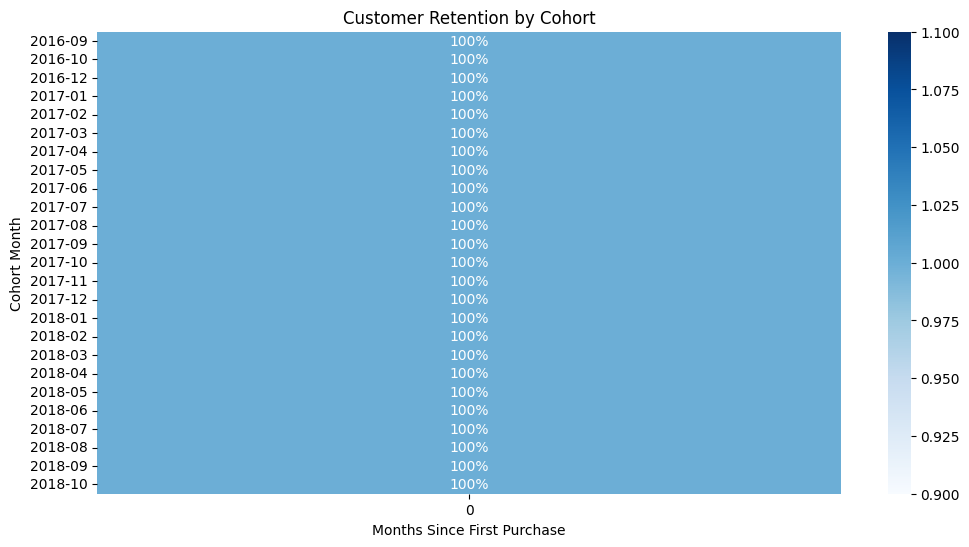

In [3]:
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

plt.figure(figsize=(12, 6))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title("Customer Retention by Cohort")
plt.ylabel("Cohort Month")
plt.xlabel("Months Since First Purchase")

## Customer Lifetime Value

In [64]:
orders = pd.read_csv('../data/olist_orders_dataset.csv')
customers = pd.read_csv('../data/olist_customers_dataset.csv')
items = pd.read_csv('../data/olist_order_items_dataset.csv')
payments = pd.read_csv('../data/olist_order_payments_dataset.csv')

# Merge untuk membentuk transaksi lengkap
df = orders.merge(customers, on='customer_id') \
           .merge(items, on='order_id') \
           .merge(payments, on='order_id')

ltv = df.groupby("customer_id")['payment_value'].sum().reset_index()
ltv.columns = ['customer_id', 'LTV']

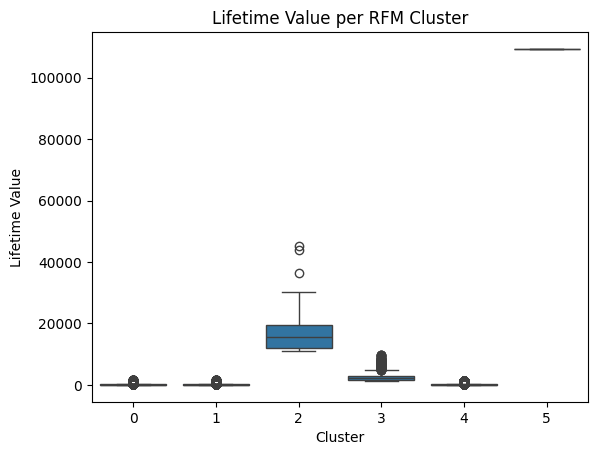

In [70]:
rfm = pd.read_csv('../data/rfm_clustered.csv')
rfm_ltv = rfm.merge(ltv, on='customer_id')
sns.boxplot(x='Cluster', y='LTV', data=rfm_ltv)
plt.title("Lifetime Value per RFM Cluster")
plt.xlabel("Cluster")
plt.ylabel("Lifetime Value")
plt.show()